In [2]:
import os
os.environ["http_proxy"] = "127.0.0.1:7890"
os.environ["https_proxy"] = "127.0.0.1:7890"
import datasets
import os, shutil
from huggingface_hub import hf_hub_download
def download_metric():
    zero_scrolls_metric_path = hf_hub_download(repo_id="tau/zero_scrolls", repo_type="dataset", filename="metrics/zero_scrolls.py",cache_dir="/data/wangzh/middle_rope/src/utils/zero_scrolls/metrics")
    updated_zero_scrolls_metric_path = (
        os.path.dirname(zero_scrolls_metric_path) + os.path.basename(zero_scrolls_metric_path).replace(".", "_") + ".py"
    )
    shutil.copy(zero_scrolls_metric_path, updated_zero_scrolls_metric_path)
    return updated_zero_scrolls_metric_path

zero_scrolls_metric_path = download_metric()

In [3]:
import datasets
predictions = ["hello there", "general kenobi"]  # List[str]
references = [["hello", "hi there"], ["commander kenobi"]]  # List[List[str]]
zero_scrolls_metric = datasets.load_metric("/data/wangzh/middle_rope/src/utils/zero_scrolls/metrics/zero_scrolls.py","gov_report")  #  "gov_report" or "summ_screen_fd" or "qmsum" or "squality]
results = zero_scrolls_metric.compute(predictions=predictions, references=references)
print(results)

/tmp/ipykernel_3401141/2945257776.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  zero_scrolls_metric = datasets.load_metric("/data/wangzh/middle_rope/src/utils/zero_scrolls/metrics/zero_scrolls.py","gov_report")  #  "gov_report" or "summ_screen_fd" or "qmsum" or "squality]


{'rouge/rouge1': 58.3333, 'rouge/rouge2': 0.0, 'rouge/rougeL': 58.3333, 'rouge/rougeLsum': 58.3333, 'rouge/geometric_mean': 0.0, 'num_predicted': 2, 'mean_prediction_length_characters': 12.5, 'zero_scrolls_score': 0.0, 'display_keys': ['rouge/rouge1', 'rouge/rouge2', 'rouge/rougeL'], 'display': [58.3333, 0.0, 58.3333]}


In [1]:
import os
os.environ["http_proxy"]="127.0.0.1:7890"
os.environ["https_proxy"]="127.0.0.1:7890"

from datasets import get_dataset_config_names
from datasets import load_dataset
# load_dataset("tau/zero_scrolls")
for sub_dataset_name in get_dataset_config_names("tau/zero_scrolls"):
    print(sub_dataset_name)
    load_dataset("tau/zero_scrolls", sub_dataset_name)

/data/wangzh/miniconda3/envs/red/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating validation split: 28 examples [00:00, 187.56 examples/s]
Generating test split: 500 examples [00:00, 1983.78 examples/s]
Generating validation split: 20 examples [00:00, 1127.64 examples/s]
Generating test split: 281 examples [00:00, 1492.81 examples/s]
Generating validation split: 20 examples [00:00, 366.98 examples/s]
Generating test split: 500 examples [00:02, 235.81 examples/s]
Generating validation split: 21 examples [00:00, 913.83 examples/s]
Generating test split: 500 examples [00:00, 2058.38 examples/s]
Generating validation split: 80 examples [00:00, 1765.13 examples/s]
Generating test split: 260 examples [00:00, 1761.06 examples/s]
Generating validation split: 20 examples [00:00, 595.58 examples/s]
Gene

In [2]:
import numpy as np
np.array([[8.0625, 7.4023, 4.8945, 5.2539, 3.4336, 3.5664, 4.1680, 4.0234, 4.2305,
        3.5859, 3.4297, 4.3555, 4.2461, 3.7441, 3.7246, 3.7832, 3.3262, 3.6816,
        3.4238, 3.5176, 3.9355, 3.6113, 3.3320, 2.8066, 3.4258, 3.1758, 3.4102,
        2.9863, 3.3242, 4.0938, 3.4316, 5.8438]])/np.array([7.8945, 7.1016, 2.1973, 2.1875, 2.3164, 2.2695, 3.1934, 3.2383, 3.5898,
        3.6797, 4.0000, 4.5078, 4.3047, 4.3945, 4.4180, 3.9863, 3.9062, 3.9336,
        3.1328, 3.5918, 3.7246, 3.0918, 2.7168, 2.9570, 3.1309, 3.1582, 3.0156,
        2.6797, 2.9316, 4.0195, 3.0215, 5.4883])-1

#理论基础，就是当模型的上下文超过预训练窗口的时候，两端的熵增大，中间的熵减小。  大的内插scale会使熵增大，小的内插会使熵减小。


#正常内插  20个样本的熵
[7.9961, 7.2461, 2.3828, 2.1934, 2.3398, 2.3965, 3.5215, 3.3184, 3.7988,
        3.7148, 4.0742, 4.5156, 4.2734, 4.2344, 4.4102, 3.9805, 3.6582, 3.9141,
        2.9102, 3.2422, 3.5117, 3.0078, 2.6953, 2.8984, 3.1230, 3.0762, 2.9805,
        2.6816, 3.0332, 3.9941, 2.8848, 5.4141]

#内插为正常的1.2 20个样本
[7.9805, 7.2773, 2.2910, 2.0625, 2.2461, 2.4023, 3.5449, 3.3789, 3.7168,
        3.6543, 4.0039, 4.4258, 4.2031, 4.1641, 4.3516, 3.9160, 3.6289, 3.8438,
        2.8965, 3.2129, 3.5215, 3.0254, 2.6816, 2.8477, 3.1777, 3.0977, 2.9434,
        2.5898, 2.9453, 3.9707, 2.8223, 5.1641]
#内插会使熵减小


#四千八
[8.2266, 7.4141, 6.0469, 6.2461, 5.5195, 5.3828, 5.2617, 5.5586, 6.1484,
        5.6133, 5.0547, 5.2500, 5.3359, 4.8242, 4.3672, 4.2227, 4.2422, 3.4160,
        3.5508, 2.5605, 2.7832, 2.1582, 2.8613, 2.5059, 2.5977, 1.9580, 2.5332,
        2.9375, 3.0859, 3.6602, 3.4980, 5.5195]

#四千八内插之后的
[8.1172, 7.2695, 2.4336, 2.2031, 2.2656, 2.3340, 3.3457, 3.1602, 3.6777,
        3.5781, 3.8848, 4.4219, 4.0273, 4.0508, 4.2188, 3.8008, 3.5566, 3.6328,
        2.8438, 3.0566, 3.2793, 2.7227, 2.6562, 2.6621, 2.8516, 2.7383, 2.9023,
        2.4297, 2.6777, 3.5508, 2.7070, 5.2109]

#4096正常的熵分布
[7.9492, 7.1016, 2.2246, 2.2363, 2.3047, 2.3770, 3.2676, 3.0996, 3.5488,
        3.5293, 3.7812, 4.2891, 3.9688, 3.9648, 4.1406, 3.7832, 3.5469, 3.5254,
        2.8340, 3.0918, 3.2969, 2.7051, 2.6191, 2.6543, 2.8398, 2.7969, 2.9102,
        2.4219, 2.7148, 3.5020, 2.7070, 5.1523]

#5k内插
[8.1406, 7.3086, 2.4258, 2.2148, 2.2930, 2.4219, 3.3828, 3.2578, 3.8125,
        3.7148, 3.9570, 4.4609, 4.1211, 4.0977, 4.2734, 3.8438, 3.6309, 3.7207,
        2.8945, 3.0762, 3.3945, 2.8203, 2.7168, 2.6973, 2.9473, 2.8398, 2.9727,
        2.4629, 2.7090, 3.6152, 2.7656, 5.2656]


#四千五
[8.0625, 7.4023, 4.8945, 5.2539, 3.4336, 3.5664, 4.1680, 4.0234, 4.2305,
        3.5859, 3.4297, 4.3555, 4.2461, 3.7441, 3.7246, 3.7832, 3.3262, 3.6816,
        3.4238, 3.5176, 3.9355, 3.6113, 3.3320, 2.8066, 3.4258, 3.1758, 3.4102,
        2.9863, 3.3242, 4.0938, 3.4316, 5.8438]


#长度四千的熵
[7.8945, 7.1016, 2.1973, 2.1875, 2.3164, 2.2695, 3.1934, 3.2383, 3.5898,
        3.6797, 4.0000, 4.5078, 4.3047, 4.3945, 4.4180, 3.9863, 3.9062, 3.9336,
        3.1328, 3.5918, 3.7246, 3.0918, 2.7168, 2.9570, 3.1309, 3.1582, 3.0156,
        2.6797, 2.9316, 4.0195, 3.0215, 5.4883]

#长度为三千的熵
[7.5938, 6.8398, 2.0410, 1.9141, 2.1426, 2.1895, 3.0781, 3.1797, 3.4844,
        3.4746, 3.7324, 4.1914, 3.8828, 3.9102, 4.1406, 3.8887, 3.6289, 3.4238,
        2.7910, 3.2031, 3.3340, 2.7852, 2.6035, 2.7422, 2.9668, 2.9434, 2.8145,
        2.2891, 2.6191, 3.5410, 2.5645, 4.9023]



#对于长文本外推
#正常的内插还是会与原来的分布有一点的差距



array([[ 0.02128064,  0.04234257,  1.22750649,  1.40178286,  0.48230012,
         0.57144746,  0.30519196,  0.24244202,  0.17847791, -0.02549121,
        -0.142575  , -0.03378588, -0.01361303, -0.14800319, -0.15694885,
        -0.0509495 , -0.1484819 , -0.06406345,  0.09288815, -0.02065817,
         0.05662353,  0.1680251 ,  0.22644287, -0.05086236,  0.09419017,
         0.00557279,  0.1308529 ,  0.11441579,  0.13392004,  0.01848489,
         0.13572729,  0.06477416]])

In [30]:
import numpy as np
data = np.array([8.1172, 7.2695, 2.4336, 2.2031, 2.2656, 2.3340, 3.3457, 3.1602, 3.6777,
        3.5781, 3.8848, 4.4219, 4.0273, 4.0508, 4.2188, 3.8008, 3.5566, 3.6328,
        2.8438, 3.0566, 3.2793, 2.7227, 2.6562, 2.6621, 2.8516, 2.7383, 2.9023,
        2.4297, 2.6777, 3.5508, 2.7070, 5.2109])/np.array([7.9492, 7.1016, 2.2246, 2.2363, 2.3047, 2.3770, 3.2676, 3.0996, 3.5488,
        3.5293, 3.7812, 4.2891, 3.9688, 3.9648, 4.1406, 3.7832, 3.5469, 3.5254,
        2.8340, 3.0918, 3.2969, 2.7051, 2.6191, 2.6543, 2.8398, 2.7969, 2.9102,
        2.4219, 2.7148, 3.5020, 2.7070, 5.1523])
# import matplotlib.pyplot as plt
# plt.plot(data[::4])
data

array([1.0211342 , 1.02364256, 1.09394947, 0.98515405, 0.98303467,
       0.98190997, 1.02390133, 1.01955091, 1.03632214, 1.0138271 ,
       1.02739871, 1.03096221, 1.01473997, 1.02169088, 1.01888615,
       1.00465215, 1.00273478, 1.03046463, 1.00345801, 0.98861505,
       0.99466165, 1.00650623, 1.01416517, 1.00293863, 1.00415522,
       0.97904823, 0.99728541, 1.00322061, 0.98633417, 1.01393489,
       1.        , 1.01137356])

In [4]:
#4096正常的熵分布
import numpy as np
# np.array([7.9492, 7.1016, 2.2246, 2.2363, 2.3047, 2.3770, 3.2676, 3.0996, 3.5488,
#         3.5293, 3.7812, 4.2891, 3.9688, 3.9648, 4.1406, 3.7832, 3.5469, 3.5254,
#         2.8340, 3.0918, 3.2969, 2.7051, 2.6191, 2.6543, 2.8398, 2.7969, 2.9102,
#         2.4219, 2.7148, 3.5020, 2.7070, 5.1523])-np.array([8.1406, 7.3086, 2.4258, 2.2148, 2.2930, 2.4219, 3.3828, 3.2578, 3.8125,
#         3.7148, 3.9570, 4.4609, 4.1211, 4.0977, 4.2734, 3.8438, 3.6309, 3.7207,
#         2.8945, 3.0762, 3.3945, 2.8203, 2.7168, 2.6973, 2.9473, 2.8398, 2.9727,
#         2.4629, 2.7090, 3.6152, 2.7656, 5.2656])
#内插5k的各层的熵

five_k = np.array([8.1484, 7.3086, 2.4336, 2.2070, 2.2871, 2.3906, 3.3984, 3.2480, 3.7988,
        3.6445, 3.9102, 4.4375, 4.1133, 4.0625, 4.2422, 3.8359, 3.5820, 3.6211,
        2.8066, 3.0020, 3.2676, 2.6777, 2.6758, 2.6465, 2.8379, 2.7891, 2.8691,
        2.4688, 2.7344, 3.5605, 2.8164, 5.2773])

#4096
ori_k = np.array([7.9570, 7.1055, 2.2129, 2.1797, 2.2676, 2.3398, 3.3066, 3.1113, 3.6309,
        3.5195, 3.7988, 4.2969, 3.9961, 3.9531, 4.1445, 3.7520, 3.5078, 3.4902,
        2.7266, 2.9336, 3.1758, 2.5918, 2.6230, 2.6191, 2.7656, 2.7559, 2.8184,
        2.4414, 2.6836, 3.5000, 2.7500, 5.1484])

layer_scales = np.zeros_like(five_k)
diff_data = np.abs(five_k-ori_k)
# scales = np.hstack((np.linspace(1.2207,1.5207,16),np.linspace(1.5207,1.2207,16)))
scales = np.hstack((np.linspace(1.953,2.253,16),np.linspace(2.253,1.953,16)))

# for i,index in enumerate(np.argsort(diff_data)):
#     layer_scales[index] = scales[i]

# for i,index in enumerate(np.argsort(scales)):
#     layer_scales[i] = scales[i]

print(scales.tolist())


[1.953, 1.973, 1.993, 2.013, 2.033, 2.053, 2.073, 2.093, 2.113, 2.133, 2.153, 2.173, 2.193, 2.213, 2.233, 2.253, 2.253, 2.233, 2.213, 2.193, 2.173, 2.153, 2.133, 2.113, 2.093, 2.073, 2.053, 2.033, 2.013, 1.993, 1.973, 1.953]


In [1]:
#提取内部表征，分析相关的相似性
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"
# import torch
# from  src.modify_arch.new_no_position_attention import LlamaAttention
# from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig
# config = AutoConfig.from_pretrained("lmsys/vicuna-7b-v1.5")
# # config.rope_scaling = {"type": "linear", "factor": 2}
# model = AutoModelForCausalLM.from_pretrained("lmsys/vicuna-7b-v1.5", torch_dtype=torch.bfloat16, device_map="auto", config=config)
# model.model.layers[16].self_attn = LlamaAttention(config,layer_idx=16)
# tokenizer = AutoTokenizer.from_pretrained("lmsys/vicuna-7b-v1.5")

from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig, LlamaForCausalLM
from  src.modify_arch.new_no_position_attention import LlamaAttention #没有位置编码
from transformers.models.llama.modeling_llama import LlamaLinearScalingRotaryEmbedding
import torch
import copy

class LayerwiseLlamaForCausalLM(LlamaForCausalLM):
    def __init__(self, config):
        super().__init__(config)
        self.config = config
        for layer_num in [2,3,4,5,6,15,16,17]:
            self.model.layers[layer_num].self_attn = LlamaAttention(config,layer_idx=layer_num)
    
    #传入层数以及对应的scale，进行重新赋值！
    def replace_position_embeddings(self,layer_ids,layer_scales):
        for layer_id, layer_scale in zip(layer_ids, layer_scales):
            # print(f"layer_id{layer_id}----->device{self.model.layers[layer_id].self_attn.q_proj.weight.device}")
            modify_position_embedding = LlamaLinearScalingRotaryEmbedding(self.config.head_dim, max_position_embeddings=self.config.max_position_embeddings, scaling_factor=layer_scale, device=self.model.layers[layer_id].self_attn.q_proj.weight.device)
            setattr(self.model.layers[layer_id].self_attn, "rotary_emb", modify_position_embedding)

def setup_models_layerwise(model_name):
    enable_changed_rope = True
    config = AutoConfig.from_pretrained(model_name)
    config._attn_implementation = "eager"
    tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False,padding_side='left')
    if tokenizer.pad_token is None:
        tokenizer.add_special_tokens({'pad_token': '<custom_pad>'})
    if enable_changed_rope:
        # config.apply_layers = list(int(x) for x in args.apply_layers.split(','))
        model = LayerwiseLlamaForCausalLM.from_pretrained(model_name, config=config, torch_dtype=torch.bfloat16, device_map="auto")
    else:
        model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.bfloat16)
    model.resize_token_embeddings(len(tokenizer))
    return config, tokenizer, model.eval()

config,tokenizer,model = setup_models_layerwise("lmsys/vicuna-7b-v1.5")

/data/wangzh/miniconda3/envs/red/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]/data/wangzh/miniconda3/envs/red/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Loading checkpoint shards: 100%|██████████| 2/2 [00:09<00:00,  4.70s/it]
/data/wangzh/miniconda3/envs/red/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterizati

In [2]:
#准备输入prompt
prompt="You are given 7 summaries of chapters or parts of a novel, in a shuffled order, where each summary is denoted by a numerical ID (e.g. Summary 1, Summary 3, etc.). Reorder the summaries according to the original order of chapters/parts in the novel by writing a list of length 7 of the summary IDs (e.g. if you were given 5 summaries, one possible answer could be \"5, 1, 3, 4, 2\").\n\nSummaries:\nSummary 1:\nIn the Greek camp, the newly arrived Cressida is greeted by all the Greek commanders. Ulysses insists that she be kissed by everyone, only then refusing to kiss her himself--and when she is gone, he declares that she is a loose, unvirtuous woman. Then the Trojan lords arrive, and the conditions of the duel are set by Aeneas, who remarks that since Ajax and Hector are related, Hector's whole heart will not be in this fight. As the two combatants prepare, Agamemnon asks Ulysses \"what Trojan is that same that looks so heavy?\". Ulysses tells his general that the downcast Trojan is Troilus, and then goes on to praise him profusely, saying that Troilus may even be a greater man than Hector. Ajax and Hector fight for a time and then break off, agreeing to call the duel a draw and embrace as kinsmen. Then Hector is invited to come unarmed to the Greek tents, since Achilles desires to see him; Hector agrees to come, accompanied by Troilus. He meets the Greek commanders, and greets them one by one, exchanging compliments down the line until he reaches Achilles, with whom he trades insults. Achilles promises to meet him on the field of battle the following day, and kill him; Hector retorts that he looks forward to their meeting. On that note, the Greek lords lead their guests to the feast. As they go, Troilus asks Ulysses where Calchas's tent lies, planning to find Cressida there later that night. Ulysses promises to lead him there, but also notes that Diomedes has been looking at Cressida lustfully. After the feast, Achilles boasts to Patroclus of how he will kill Hector the next day. The two encounter Thersites, who delivers a letter to Achilles, and then unloads his usual torrent of abuse on them and on the entire campaign. The letter is from the Trojan princess whom Achilles loves, and it begs him not to fight the next day; he tells Patroclus sadly that he must obey her wishes. They go out, and Thersites remains; he watches from the shadows as the feast breaks up. Most of the lords go to bed, but Diomedes slips off to see Cressida, and Ulysses and Troilus follow him. Noting that Diomedes is an untrustworthy, lustful rogue, Thersites follows him as well.\n\nSummary 2:\nIn the Greek camp, Ajax summons his slave, Thersites, and orders him to find out the nature of the proclamation that has just been posted. Thersites, a foul-mouthed ruffian, refuses to obey and instead curses his master and the Greeks with equal vigor, provoking Ajax to beat him. Achilles and Patroclus come upon them, and Thersites includes the two newcomers in his curses. They send him away, and Achilles tells Ajax the news of Hector's challenge to any brave Greek warrior. The selection of the warrior has been put to a lottery--otherwise, Achilles says as he leaves, he would have been the only possible choice, a remark that produces a sneer from Ajax. In Troy, King Priam and his sons debate the wisdom of continuing the war, when they can end it by returning Helen to the Greeks. Hector, supported by his brother Helenus, argues eloquently that while the theft of Helen may have been a brave act, she cannot be worth the great and bloody price they are paying to keep her. When he is done speaking, his sister Cassandra, a prophetess who is considered mad, dashes in and cries that if they do not let Helen go, Troy will burn. When she is gone, Troilus dismisses her warning as ravings, and argues that they must keep Helen for the sake of their honor--and Paris supports him, declaring that his stolen woman is worth more than \"the world's large spaces\"  and must be fought for. Hector retorts that this is why young men cannot be trusted to make moral decisions, since \"the hot passion of distempered blood\"  overwhelms their reason, but when Troilus says that Helen is more than a woman, she is \"a theme of honor and renown\", Hector yields and agrees to continue the war. He goes on to report the challenge that has been sent out to the Greeks, and how he hopes it will bring Achilles to the field. Alone, Thersites sneers at the pretensions of both Ajax and Achilles. When Patroclus and Achilles appear, he calls them fools; Patroclus moves to strike him, but Achilles holds him off. They see the Greek commanders--Agamemnon, Ulysses, Nestor, and Diomedes--approaching, accompanied by Ajax, and Achilles quickly retires to his tent. When Agamemnon asks to see him Patroclus tells the general that Achilles is ill. Agamemnon grows angry, but Achilles refuses to emerge, and tells Ulysses, who goes in to see him, that he still refuses to fight the Trojans. Agamemnon suggests that Ajax go in and plead with Achilles, but Ulysses declares that doing so would be insulting to Ajax, and then he, with the other Greek commanders, praises Ajax profusely, saying that he is the best of their warriors. They agree to leave Achilles in his tent, and decide that Ajax will be their champion against Hector the next day.\n\nSummary 3:\nMeanwhile, in the Greek camp, the great general and king Agamemnon is conversing with his lieutenants and fellow kings. He asks why they seem so glum and downcast--for although their seven-year siege of Troy has met with little success so far, they should welcome the adversity that the long war represents, since only in difficult times can greatness emerge. Nestor, the oldest of the Greek commanders, echoes Agamemnon's argument, citing examples of how heroism emerges from hardship. In response, Ulysses expresses his deep respect for what they have said, but points out that the Greek army is facing a crisis not because of the duration of the war, but because of a breakdown in authority within the Greek camp. Instead of being united, they are divided into factions--and at the root of this crisis is the greatest of the Greek warriors, Achilles, who refuses to fight and instead sits in his tent while his friend  Patroclus makes fun of the Greek commanders. Others, like Ajax and his foul-mouthed slave, Thersites, follow this example, and so the entire army is corrupted."
tokenized_data = tokenizer([prompt],return_tensors='pt')
output = model(tokenized_data["input_ids"].cuda(),output_hidden_states=True)

The attention layers in this model are transitioning from computing the RoPE embeddings internally through `position_ids` (2D tensor with the indexes of the tokens), to using externally computed `position_embeddings` (Tuple of tensors, containing cos and sin). In v4.46 `position_ids` will be removed and `position_embeddings` will be mandatory.


In [3]:
import numpy as np
def cosine_similarity(vec1, vec2):
    # 将向量转为 numpy 数组
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    
    # 计算余弦相似度
    dot_product = np.dot(vec1, vec2)  # 点积
    norm_vec1 = np.linalg.norm(vec1)  # 向量1的模
    norm_vec2 = np.linalg.norm(vec2)  # 向量2的模
    
    # 避免除以零
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0
    
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

hidden_states = torch.vstack(output["hidden_states"])[4].float().cpu().detach().numpy()
result = []
token_num,_ = hidden_states.shape
hidden_states_start = hidden_states[:100].mean(axis=0)
# for data in hidden_states[int(token_num/3):2*int(token_num/3)]:
for data in hidden_states[100:]:
    result.append(cosine_similarity(data,hidden_states_start))


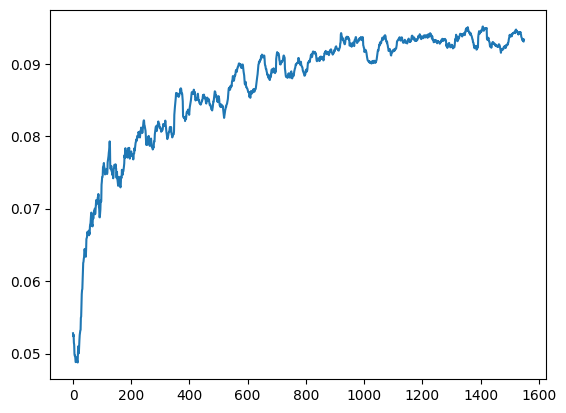

In [4]:
import matplotlib.pyplot as plt
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
plt.plot(moving_average(result,30))

In [15]:
import pickle
data = pickle.load(open("/data/wangzh/middle_rope/data/synthwiki/generated_data/syn_vicuna-7b-v1.5_3000_epoch_5_first.pickle","rb"))
data1 = pickle.load(open("/data/wangzh/middle_rope/data/synthwiki/generated_data/syn_vicuna-7b-v1.5_3000_epoch_5_halfway.pickle","rb"))
len(data)

4970

In [7]:
#filter data
from src.utils.synthwiki.evaluate_synthwiki import checkCorrectness
import json
from xopen import xopen
file_paths = ["/data/wangzh/middle_rope/result/layerwise/syn2_3000_first.json",
              "/data/wangzh/middle_rope/result/layerwise/syn2_3000_halfway.json",
              "/data/wangzh/middle_rope/result/layerwise/syn2_3000_last.json"]
result = []
for i,file_path in enumerate(file_paths):
    with xopen(file_path,"r") as fin:
        for j, line in enumerate(fin):
            input_example = json.loads(line)
            if i == 0:
                input_example["num_correct"] = checkCorrectness(input_example["model_answer"],input_example["answers"])
                result.append(input_example)
            else:
                result[j]["num_correct"] += checkCorrectness(input_example["model_answer"],input_example["answers"])

In [10]:
with xopen("./data/synthwiki/generated_data/syn_vicuna_filter_true.json", "w") as f:
    for data in result:
        if data["num_correct"] != 3 and data["num_correct"] != 0:
            f.write(json.dumps(data) + "\n")

tensor([21.6500,  1.1500], dtype=torch.float64)
tensor([21.5183,  1.1851], dtype=torch.float64)
tensor([21.3317,  1.2181], dtype=torch.float64)
tensor([21.0928,  1.2490], dtype=torch.float64)
tensor([20.8042,  1.2777], dtype=torch.float64)
tensor([20.4684,  1.3043], dtype=torch.float64)
tensor([20.0881,  1.3287], dtype=torch.float64)
tensor([19.6658,  1.3510], dtype=torch.float64)
tensor([19.2040,  1.3712], dtype=torch.float64)
tensor([18.7053,  1.3892], dtype=torch.float64)
tensor([18.1724,  1.4051], dtype=torch.float64)
tensor([17.6077,  1.4188], dtype=torch.float64)
tensor([17.0139,  1.4304], dtype=torch.float64)
tensor([16.3936,  1.4398], dtype=torch.float64)
tensor([15.7492,  1.4471], dtype=torch.float64)
tensor([15.0833,  1.4523], dtype=torch.float64)
tensor([14.3986,  1.4554], dtype=torch.float64)
tensor([13.6976,  1.4562], dtype=torch.float64)
tensor([12.9829,  1.4550], dtype=torch.float64)
tensor([12.2570,  1.4516], dtype=torch.float64)
tensor([11.5225,  1.4461], dtype=torch.f

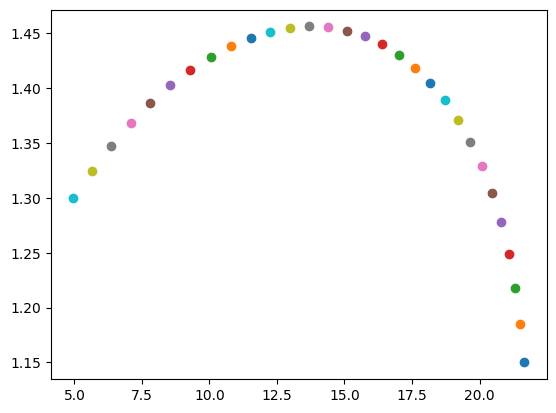

In [40]:
#赛贝尔曲线绘画
import torch
def Bezier(ts, points):
    n = points.shape[0] - 1  # n可以取到
     # 基函数结果
    result = []
    for t in ts:
        res = 0
        c = 1 
        for i in range(n+1):  # n可以取到
            if i > 0:
                c = c * (n - i + 1) / i  # 更新贝塞尔基函数的结果系数
            _1_t = (1-t)**i  # (1-t)^i
            _t = t**(n-i)  # t^(n-i)
            res += c * _1_t * _t * points[i]
        result.append(res)
    return result

# def Bezier(ts, points):
#     n = points.shape[0] - 1  # n可以取到
#      # 基函数结果
#     result = []
#     for t in ts:
#         res = 0
#         c = 1 
#         for i in range(n+1):  # n可以取到
#             if i > 0:
#                 c = c * (n - i + 1) / i  # 更新贝塞尔基函数的结果系数
#             _1_t = (1-t)**i  # (1-t)^i
#             _t = t**(n-i)  # t^(n-i)
#             res += c * _1_t * _t * points[i]
#         result.append(res)
#     return result

points=np.array([[
                    4.95,
                    1.3000000000000005
                ],
                [
                    11.599999999999984,
                    1.5500000000000005
                ],
                [
                    20.649999999999956,
                    1.5000000000000002
                ],
                [
                    21.64999999999997,
                    1.1500000000000004
                ]
            ])
# ts = np.linspace(0,1,30)
# layer_scales =[]
# ts = torch.linspace(0,1,30)

# Bezier_result = Bezier(ts,points)
# for point in Bezier_result:
#     print(point)
#     layer_scales.append(point[1].item())

# print(layer_scales)
# result = Bezier(ts,points)
import matplotlib.pyplot as plt
for point in result:
    print(point)
    plt.scatter(point[0],point[1])